In [1]:
%pip install pandas
%pip install numpy
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: C:\Users\varun\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: numpy in c:\users\varun\appdata\local\packages\pythonsoftwarefoundation.python.3.10_qbz5n2kfra8p0\localcache\local-packages\python310\site-packages (1.24.2)




[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: C:\Users\varun\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: C:\Users\varun\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

graph_dat = pd.read_csv("../data/age_run_1_00.csv")
graph_dat = graph_dat.filter(items=["t","age","value","vartype"])
D_dat = graph_dat[(graph_dat["vartype"] == "D")] 
N_dat= graph_dat[(graph_dat["vartype"] == "N")] 
S_dat= graph_dat[(graph_dat["vartype"] == "S")] 
X_dat= graph_dat[(graph_dat["vartype"] == "Xsi1")] 
N_dat = N_dat.rename({"value":"N"},axis="columns")
S_dat = S_dat.rename({"value":"S"},axis="columns")
X_dat = X_dat.rename({"value":"Xsi"},axis="columns")
N_dat = N_dat.drop(columns="vartype")
S_dat = S_dat.drop(columns="vartype")
print(N_dat)

            t  age          N
0           0    0  3269815.0
8           0    1  4191944.0
16          0    2  5251203.0
24          0    3  4784447.0
32          0    4  4475176.0
...       ...  ...        ...
4971259  7299   80  2040979.0
4971267  7299   81  1958226.0
4971275  7299   82  1775158.0
4971283  7299   83  1263196.0
4971291  7299   84  7416161.0

[620500 rows x 3 columns]


Text(0.5, 1.0, 'Ageing, resetting age 0 to 10k')

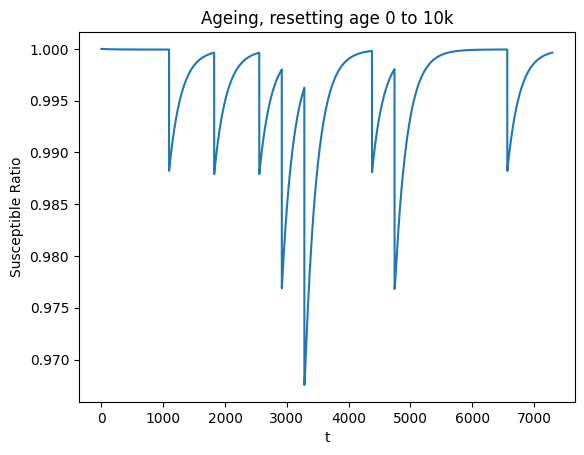

In [3]:
all_dat = N_dat.merge(S_dat,left_on=["t","age"],right_on=["t","age"])
total_dat = all_dat.groupby(["t"]).sum()
total_dat["Susceptible Ratio"] = total_dat["S"]/total_dat["N"]
sns.lineplot(data=total_dat,x="t",y="Susceptible Ratio")
plt.title("Ageing, resetting age 0 to 10k")

C:\Users\varun\AppData\Local\Temp\ipykernel_33684\3570027679.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rt_dat["year"] = graph_dat["t"]/365.0


Text(0.5, 1.0, 'Rt graph, ageing 10K')

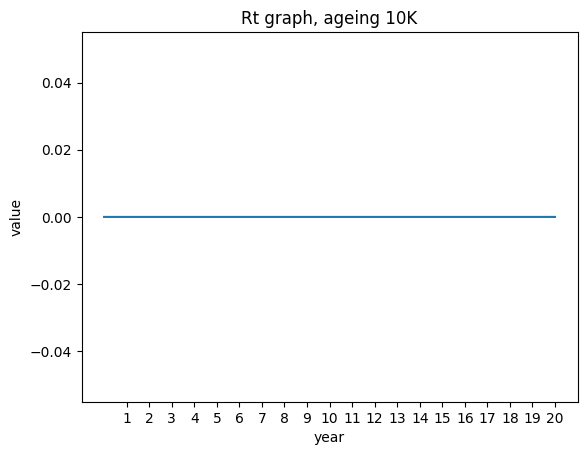

In [4]:
rt_dat= graph_dat[(graph_dat["vartype"] == "Rt")] 
rt_dat["year"] = graph_dat["t"]/365.0
sns.lineplot(data=rt_dat,x="year",y="value")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
plt.title("Rt graph, ageing 10K")
#plt.ylim(0,5)

In [5]:
#N_dat = graph_dat[(graph_dat["vartype"] == "N")] 
N_dat["year"] = (D_dat["t"] % 20)
summed_vals = N_dat.groupby("t")["value"].sum()
print(summed_vals)
summed_vals = list(summed_vals)
plt.plot(summed_vals)
#sns.lineplot(data=summed_vals,x="t",y="value")
plt.title("Population graph, ageing 10K")

KeyError: 'Column not found: value'

year
0     3774327.0
1     3777345.0
2     3771860.0
3     3772434.0
4     3773113.0
5     3777147.0
6     3775986.0
7     3773193.0
8     3773526.0
9     3773338.0
10    3772757.0
11    3771953.0
12    3773839.0
13    3774903.0
14    3770114.0
15    3772429.0
16    3776885.0
17    3781279.0
18    3772509.0
19    3773373.0
Name: value, dtype: float64


C:\Users\varun\AppData\Local\Temp\ipykernel_33684\2014192802.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  D_dat["year"] = (D_dat["t"] % 20)


Text(0.5, 1.0, 'Natural Mortality graph, ageing 10K')

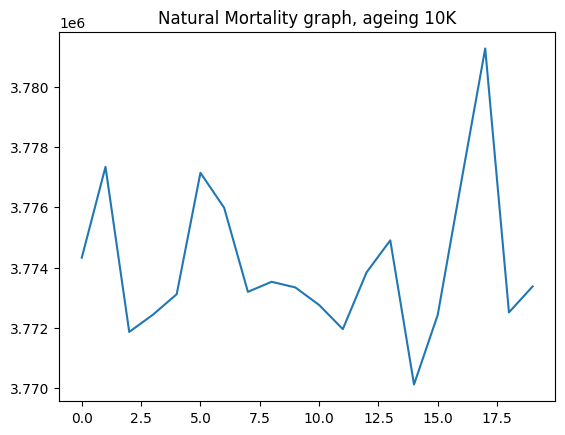

In [6]:
D_dat = graph_dat[(graph_dat["vartype"] == "D")] 
D_dat["year"] = (D_dat["t"] % 20)
summed_vals = D_dat.groupby("year")["value"].sum()
print(summed_vals)
summed_vals = list(summed_vals)
plt.plot(summed_vals)
#sns.lineplot(data=summed_vals,x="t",y="value")
plt.title("Natural Mortality graph, ageing 10K")

            t  age          N  year
0           0    0  3269815.0   NaN
8           0    1  4191944.0   NaN
16          0    2  5251203.0   NaN
24          0    3  4784447.0   NaN
32          0    4  4475176.0   NaN
...       ...  ...        ...   ...
4971259  7299   80  2040979.0   NaN
4971267  7299   81  1958226.0   NaN
4971275  7299   82  1775158.0   NaN
4971283  7299   83  1263196.0   NaN
4971291  7299   84  7416161.0   NaN

[620500 rows x 4 columns]


Text(0.5, 1.0, 'Age 0, resetting age 0 to 10K')

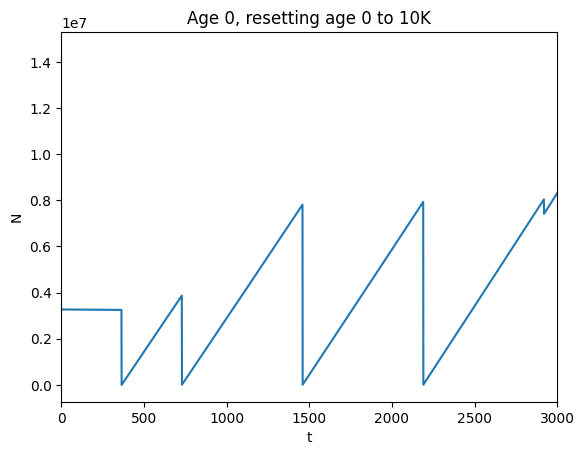

In [7]:
all_dat = N_dat.merge(S_dat,left_on=["t","age"],right_on=["t","age"])
print(N_dat)
all_dat = all_dat[all_dat["age"] == 0]
total_dat = all_dat.groupby(["t"]).sum()
#total_dat["year"] = total_dat["t"] % 365
total_dat["ratio"] = total_dat["S"]/total_dat["N"]
#total_dat["year"] = pd.Series(range(1,20*365))
#total_dat["year"] = total_dat["year"]/365 
#print(total_dat["year"])
sns.lineplot(data=total_dat,x="t",y="N")
plt.xlim(0,3000)
plt.title("Age 0, resetting age 0 to 10K")

In [ ]:
all_dat = N_dat.merge(S_dat,left_on=["t","age"],right_on=["t","age"])
print(N_dat)
all_dat = all_dat[all_dat["age"] == 1]
total_dat = all_dat.groupby(["t"]).sum()
#total_dat["year"] = total_dat["t"] % 365
total_dat["ratio"] = total_dat["S"]/total_dat["N"]
#total_dat["year"] = pd.Series(range(1,20*365))
#total_dat["year"] = total_dat["year"]/365 
#print(total_dat["year"])
sns.lineplot(data=total_dat,x="t",y="N")
plt.xlim(0,3000)
plt.title("Age 1")

Text(0.5, 1.0, 'Age 31, resetting age 0 to 10K')

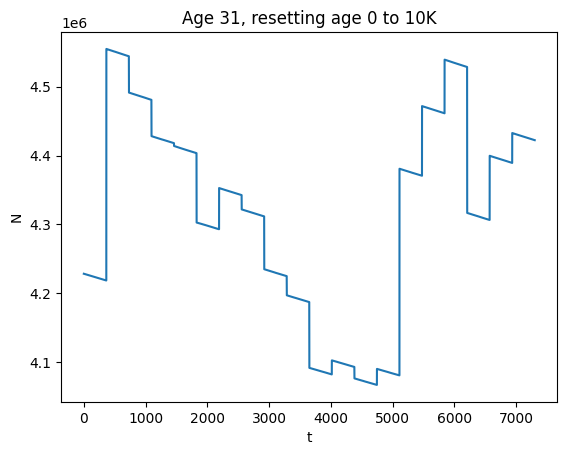

In [8]:

all_dat = N_dat.merge(S_dat,left_on=["t","age"],right_on=["t","age"])
all_dat = all_dat[all_dat["age"] == 31]
total_dat = all_dat.groupby(["t"]).sum()
total_dat["ratio"] = total_dat["S"]/total_dat["N"]
sns.lineplot(data=total_dat,x="t",y="N")
plt.title("Age 31, resetting age 0 to 10K")

# t,age,value,vartype
# t,age,N,S

Text(0.5, 1.0, 'Age 16 Population Graph')

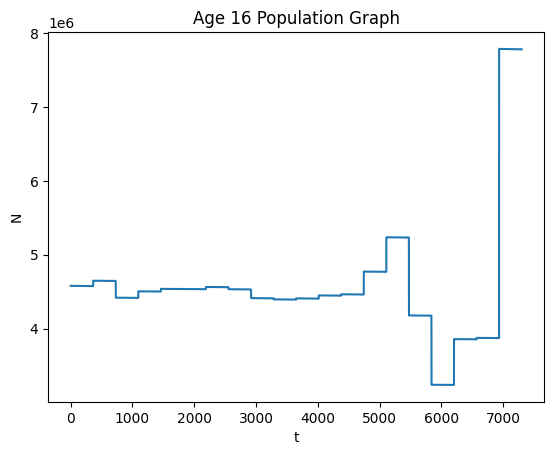

In [9]:
all_dat = N_dat.merge(S_dat,left_on=["t","age"],right_on=["t","age"])
all_dat = all_dat[all_dat["age"] == 16]
total_dat = all_dat.groupby(["t"]).sum()
total_dat["ratio"] = total_dat["S"]/total_dat["N"]
sns.lineplot(data=total_dat,x="t",y="N")
plt.title("Age 16 Population Graph")


In [14]:
total_dat.tail()

,age,N,year,S,ratio
t,,,,,
7295,31,4426362.0,0.0,4426111.0,0.999943
7296,31,4426323.0,0.0,4426071.0,0.999943
7297,31,4426306.0,0.0,4426054.0,0.999943
7298,31,4426267.0,0.0,4426015.0,0.999943
7299,31,4426236.0,0.0,4425983.0,0.999943


KeyboardInterrupt: 

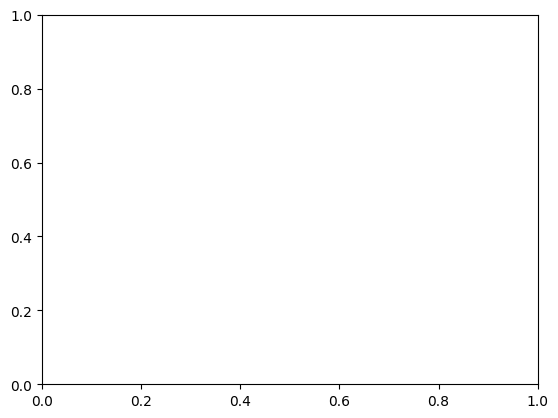

In [15]:
# births being 1million per year
graph_dat = pd.read_csv("mod_birth.csv")
graph_dat = graph_dat.filter(items=["t","age","value","vartype"])
N_dat= graph_dat[(graph_dat["vartype"] == "N")] 
S_dat= graph_dat[(graph_dat["vartype"] == "S")] 
N_dat = N_dat.rename({"value":"N"},axis="columns")
S_dat = S_dat.rename({"value":"S"},axis="columns")
N_dat = N_dat.drop(columns="vartype")
S_dat = S_dat.drop(columns="vartype")
#
all_dat = N_dat.merge(S_dat,left_on=["t","age"],right_on=["t","age"])
total_dat = all_dat.groupby(["t","age"]).sum()
total_dat["ratio"] = total_dat["S"]/total_dat["N"]
sns.lineplot(data=total_dat,x="t",y="ratio")
plt.title("Ageing, resetting age 0 to 1 million")

# t,age,value,vartype
# t,age,N,S

Text(0.5, 1.0, 'Rt graph, ageing 1 million')

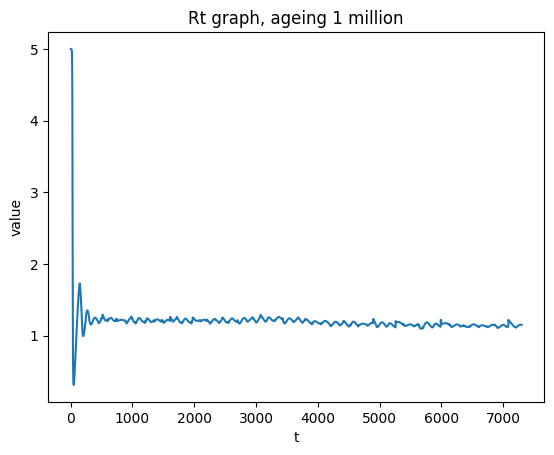

In [8]:
rt_dat= graph_dat[(graph_dat["vartype"] == "Rt")] 
sns.lineplot(data=rt_dat,x="t",y="value")
plt.title("Rt graph, ageing 1 million")

year
0     5103839.0
1     5100792.0
2     5096568.0
3     5091754.0
4     5089312.0
5     5105313.0
6     5099946.0
7     5094914.0
8     5089870.0
9     5090149.0
10    5098269.0
11    5093258.0
12    5090352.0
13    5085438.0
14    5081340.0
15    5093767.0
16    5091350.0
17    5086888.0
18    5086546.0
19    5080496.0
Name: value, dtype: float64


C:\Users\varun\AppData\Local\Temp\ipykernel_29500\997138544.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  D_dat["year"] = (D_dat["t"] % 20)


Text(0.5, 1.0, 'Nondampeend Natural Mortality graph, ageing 1 mil')

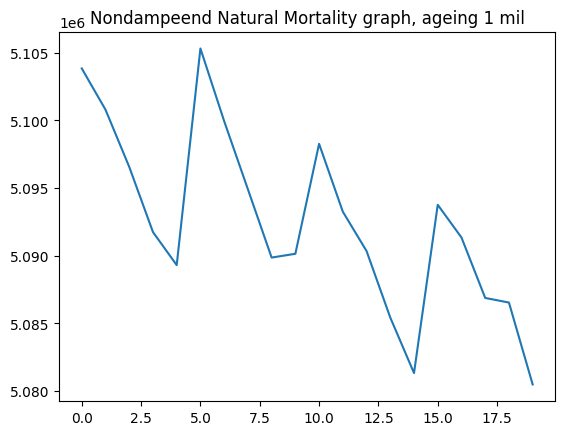

In [6]:
D_dat = graph_dat[(graph_dat["vartype"] == "D")] 
D_dat["year"] = (D_dat["t"] % 20)
summed_vals = D_dat.groupby("year")["value"].sum()
print(summed_vals)
summed_vals = list(summed_vals)
plt.plot(summed_vals)
#sns.lineplot(data=summed_vals,x="t",y="value")
plt.title("Nondampeend Natural Mortality graph, ageing 1 mil")

Text(0.5, 1.0, 'Age 0, resetting age 0 to 1 million')

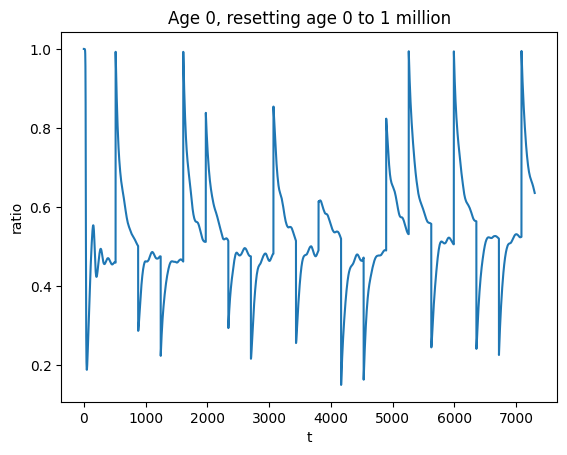

In [9]:
all_dat = N_dat.merge(S_dat,left_on=["t","age"],right_on=["t","age"])
all_dat = all_dat[all_dat["age"] == 0]
total_dat = all_dat.groupby(["t"]).sum()
total_dat["ratio"] = total_dat["S"]/total_dat["N"]
sns.lineplot(data=total_dat,x="t",y="ratio")
plt.title("Age 0, resetting age 0 to 1 million")

# t,age,value,vartype
# t,age,N,S

Text(0.5, 1.0, 'Age 31, resetting age 0 to 1 million')

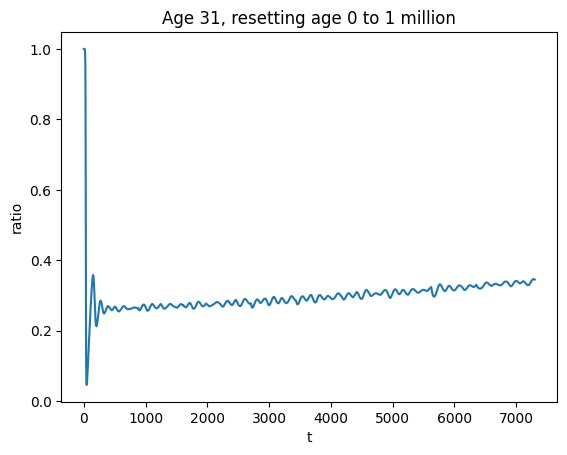

In [10]:
all_dat = N_dat.merge(S_dat,left_on=["t","age"],right_on=["t","age"])
all_dat = all_dat[all_dat["age"] == 31]
total_dat = all_dat.groupby(["t"]).sum()
total_dat["ratio"] = total_dat["S"]/total_dat["N"]
sns.lineplot(data=total_dat,x="t",y="ratio")
plt.title("Age 31, resetting age 0 to 1 million")

In [11]:
total_dat.tail()

,age,N,S,ratio
t,,,,
7295,31,4506492.0,1557573.0,0.345629
7296,31,4506487.0,1557265.0,0.345561
7297,31,4506476.0,1556664.0,0.345428
7298,31,4506466.0,1556284.0,0.345345
7299,31,4506455.0,1555664.0,0.345208
